In [1]:
import pandas as pd
import os
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
IMG_ROWS = 64
IMG_COLS = 64
IMG_CHANNELS = 3
CLASSES = 2         # bicycle, electric bicycle

In [ ]:
# Read metadata file
metadata_path = '/content/drive/MyDrive/Samples/image_labels.b.e.csv'
metadata_df = pd.read_csv(metadata_path)

In [ ]:
# Load dataset
b_file_paths = metadata_df['image_name'].apply(lambda x: os.path.join('/content/drive/MyDrive/Samples/crawling/b_bicycle', x))
e_file_paths = metadata_df['image_name'].apply(lambda x: os.path.join('/content/drive/MyDrive/Samples/crawling/e_electric_bicycle', x))
file_paths = np.concatenate((b_file_paths, e_file_paths))
labels = metadata_df['class'].map({'e': 0, 'b': 1}).values

image_vector = []
label_vector = []

for file_path, label in zip(file_paths, labels):
    if not os.path.exists(file_path):
        print(f'No file exists: {file_path}')
        continue
    try:
        img = image.load_img(file_path, target_size=(IMG_ROWS, IMG_COLS))
        img_array = image.img_to_array(img)
        image_vector.append(img_array)
        label_vector.append(label)
    except Exception as e:
        print(f'Error occured while loading image: {file_path}, Error: {e}')

In [6]:
# Transform into numpy array
image_vector = np.array(image_vector)
label_vector = np.array(label_vector)

In [7]:
# Normalize the image vector
image_vector = image_vector / 255

In [8]:
# Convert to categorical label
label_vector = to_categorical(label_vector, 2)

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(image_vector, label_vector, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(129, 64, 64, 3)
(33, 64, 64, 3)
(129, 2)
(33, 2)


In [11]:
# Define a convnet
def build_model(input_shape, classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    return model

In [12]:
# Build a model
model = build_model((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 32)                984096    
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                        

In [13]:
# Compile
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [14]:
# Fit the model
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6812 - accuracy: 0.6466 - val_loss: 2.5716e-05 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 433ms/step - loss: 3.4822e-05 - accuracy: 1.0000 - val_loss: 2.5373e-05 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 421ms/step - loss: 3.6289e-05 - accuracy: 1.0000 - val_loss: 2.5009e-05 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 416ms/step - loss: 3.5121e-05 - accuracy: 1.0000 - val_loss: 2.4645e-05 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 383ms/step - loss: 3.5143e-05 - accuracy: 1.0000 - val_loss: 2.4274e-05 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 387ms/step - loss: 3.4030e-05 - accuracy: 1.0000 - val_loss: 2.3906e-05 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 415ms/step - loss: 3.5423e-05 - accuracy: 1.0000 - val_loss: 2.352

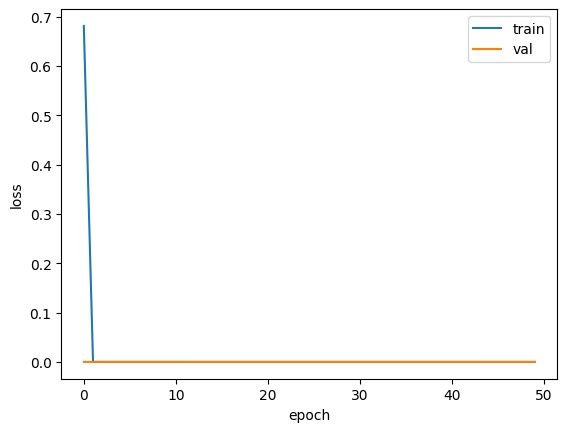

In [15]:
# Visualize loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

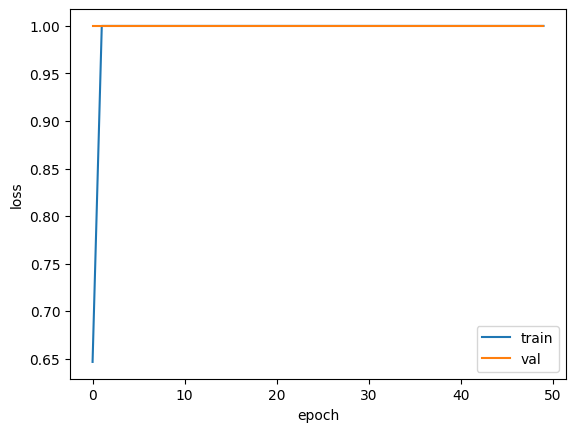

In [16]:
# Visualize accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

2/2 [==============================] - 0s 14ms/step - loss: 1.8608e-06 - accuracy: 1.0000
Test loss: 0.0000
Test accuracy: 1.0000
